# Etapa 2 - Conociendo los datos
## Histórico de Precios: Productos Terminados
### W Beams (Perfiles Estructurales)
El conjunto de datos se refiere al precio de vigas de acero con dimensiones de 8 x 8 pulgadas, bajo condiciones FOB (Free on Board) en molino en los Estados Unidos. Estas vigas, identificadas como W8x8, son componentes estructurales utilizados en la construcción y otros sectores industriales.

#### Variables
- $Date$: Fecha en que se registró el precio del producto. Es categórica y sus valores posibles están en formato "d/m/aaaa", desde el primer registro hasta el presente.
- $Low$: Precio más bajo registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $Mid$: Precio medio registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $High$: Precio más alto registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $Mid$ $Change$ $\%$: Cambio porcentual en el precio medio en comparación con el período anterior (nuevo-anterior)/anterior. Es numérica y sus valores posibles están enre -1 (-100%) y el máximo cambio positivo registrado.

#### Librerías

In [ ]:
import pandas as pd # Análisis de datos.
import matplotlib.pyplot as plt # Gráficos.
import seaborn as sns # Formato de los gráficos.

#### Comprensión de los datos

In [ ]:
# Leer el archivo Excel:
wBeamsPerfilesEstructurales_df = pd.read_excel('COPYOF~2.XLS',
  skiprows=9, nrows=220-9, engine='openpyxl')

# Mostrar las primeras filas del DataFrame:
wBeamsPerfilesEstructurales_df

,Date,Low,Mid,High,Mid Change %
0,27/2/2025,63.25,63.25,63.25,0.000000
1,30/1/2025,63.25,63.25,63.25,0.000000
2,26/12/2024,63.25,63.25,63.25,0.000000
3,2/12/2024,63.25,63.25,63.25,0.000000
4,31/10/2024,63.25,63.25,63.25,0.000000
...,...,...,...,...,...
205,14/10/2005,31.00,31.00,31.00,0.000000
206,14/9/2005,31.00,31.00,31.00,0.068966
207,14/8/2005,29.00,29.00,29.00,0.115385
208,14/7/2005,26.00,26.00,26.00,0.000000


Son 211 filas y 5 columnas.

Se agruparán los datos anteriores por mes, y se quitará la columna de 'Mid Change %', pues no es de interés para los objetivos de nuestro proyecto. De las demás columnas se obtendrá un promedio mensual.

In [ ]:
# Convertir la columna 'Date' a tipo datetime, considerando el formato d/m/aaaa:
wBeamsPerfilesEstructurales_df['Date'] = pd.to_datetime(wBeamsPerfilesEstructurales_df['Date'], dayfirst=True)

# Establecer 'Date' como índice:
wBeamsPerfilesEstructurales_df.set_index('Date', inplace=True)

# Re-muestrear los datos a nivel mensual y obtener el promedio de las columnas 'Low', 'Mid' y 'High':
wBeamsPerfilesEstructurales_df = wBeamsPerfilesEstructurales_df.resample('M')[['Low', 'Mid', 'High']].mean()

# Opcional: Reiniciar el índice para tener 'Date' como columna nuevamente:
wBeamsPerfilesEstructurales_df = wBeamsPerfilesEstructurales_df.reset_index()

# Formatear la columna 'Date' para mostrar 'NombreMes Año':
wBeamsPerfilesEstructurales_df['Date'] = wBeamsPerfilesEstructurales_df['Date'].dt.strftime('%B %Y')

# Mostrar el DataFrame resultante:
wBeamsPerfilesEstructurales_df

<ipython-input-22-8a97e5ddb3d9>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  wBeamsPerfilesEstructurales_df = wBeamsPerfilesEstructurales_df.resample('M')[['Low', 'Mid', 'High']].mean()


,Date,Low,Mid,High
0,June 2005,26.00,26.00,26.00
1,July 2005,26.00,26.00,26.00
2,August 2005,29.00,29.00,29.00
3,September 2005,31.00,31.00,31.00
4,October 2005,31.00,31.00,31.00
...,...,...,...,...
232,October 2024,63.25,63.25,63.25
233,November 2024,NaN,NaN,NaN
234,December 2024,63.25,63.25,63.25
235,January 2025,63.25,63.25,63.25


Ahora son 273 filas y 4 columnas.

#### Calidad de los datos

In [ ]:
# Contar datos nulos de cada columna:
valores_nulos_por_columna = wBeamsPerfilesEstructurales_df.isnull().sum()
valores_nulos_por_columna.name = 'Valores Nulos'
valores_nulos_por_columna

,Valores Nulos
Date,0
Low,35
Mid,35
High,35


Los valores nulos se dan porque hay meses en el dataframe original en los que no hay cambio de precio, se hará una interpolación del último dato no nulo anterior y el primer dato no nulo posterior.

In [ ]:
# Aplicar la interpolación lineal a las columnas 'Low', 'Mid' y 'High':
wBeamsPerfilesEstructurales_df[['Low', 'Mid', 'High']] = wBeamsPerfilesEstructurales_df[['Low', 'Mid', 'High']].interpolate(method='linear', limit_direction='both')

In [ ]:
valores_nulos_por_columna = wBeamsPerfilesEstructurales_df.isnull().sum()
valores_nulos_por_columna.name = 'Valores Nulos'
valores_nulos_por_columna

,Valores Nulos
Date,0
Low,0
Mid,0
High,0


Ya no hay datos nulos.

In [ ]:
# Contar registros duplicados:
num_duplicados = wBeamsPerfilesEstructurales_df.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

# Visualizar los registros duplicados (si existen):
if num_duplicados > 0:
    duplicados = wBeamsPerfilesEstructurales_df[wBeamsPerfilesEstructurales_df.duplicated()]
    print("Registros duplicados:")
    print(duplicados)

Número de registros duplicados: 0


In [ ]:
# Detectar registros con valores fuera del rango esperado:
erroneos = wBeamsPerfilesEstructurales_df[(wBeamsPerfilesEstructurales_df['Low'] < 0) | (wBeamsPerfilesEstructurales_df['Mid'] < 0) | (wBeamsPerfilesEstructurales_df['High'] < 0)]
print("Registros con valores erróneos en 'Low':")
print(erroneos)

Registros con valores erróneos en 'Low':
Empty DataFrame
Columns: [Date, Low, Mid, High]
Index: []


Los precios están dentro del rango correcto.

In [ ]:
wBeamsPerfilesEstructurales_df.dtypes # Tipos de dato.

,0
Date,object
Low,float64
Mid,float64
High,float64


Todos los datos tienen el tipo correcto.

#### Medidas estadísticas

In [ ]:
# Lista de columnas cuantitativas:
numeric_columns = ['Low', 'Mid', 'High']

for col in numeric_columns:
    print(f"Variable: {col}")
    # Medidas de tendencia central:
    media = wBeamsPerfilesEstructurales_df[col].mean()
    mediana = wBeamsPerfilesEstructurales_df[col].median()
    # La moda puede devolver más de un valor, por eso se imprime como Series:
    moda = wBeamsPerfilesEstructurales_df[col].mode()

    # Medidas de dispersión:
    rango = wBeamsPerfilesEstructurales_df[col].max() - wBeamsPerfilesEstructurales_df[col].min()
    varianza = wBeamsPerfilesEstructurales_df[col].var()
    desv_estandar = wBeamsPerfilesEstructurales_df[col].std()

    print(f"  Promedio/Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {list(moda)}") # Serie a lista para mayor claridad.
    print(f"  Rango (max - min): {rango}")
    print(f"  Varianza: {varianza}")
    print(f"  Desviación Estándar: {desv_estandar}\n")

Variable: Low
  Promedio/Media: 43.894672995780596
  Mediana: 39.0
  Moda: [36.0]
  Rango (max - min): 50.5
  Varianza: 154.40370598077416
  Desviación Estándar: 12.42592877739021

Variable: Mid
  Promedio/Media: 43.97020042194093
  Mediana: 39.0
  Moda: [35.75]
  Rango (max - min): 50.5
  Varianza: 153.19950367023048
  Desviación Estándar: 12.377378707554781

Variable: High
  Promedio/Media: 44.045516877637134
  Mediana: 39.0
  Moda: [36.0]
  Rango (max - min): 50.5
  Varianza: 152.10094299029765
  Desviación Estándar: 12.332921105330142



Cada variable tiene sus medidas de tendencia central y dispersión muy similares.

In [ ]:
# Tabla de distribución de frecuencia para la variable 'Date':
frecuencia_date = wBeamsPerfilesEstructurales_df['Date'].value_counts().sort_index()
print("Tabla de distribución de frecuencia (Date):")
print(frecuencia_date)
print("\n")

# Ahora, calcular la mediana de la columna 'Date':
median_date = pd.to_datetime(wBeamsPerfilesEstructurales_df['Date'], dayfirst=True).median()

# Mostrar la mediana formateada:
print("Mediana de las fechas:", median_date.strftime("%B %Y"))

Tabla de distribución de frecuencia (Date):
Date
April 2006        1
April 2007        1
April 2008        1
April 2009        1
April 2010        1
                 ..
September 2020    1
September 2021    1
September 2022    1
September 2023    1
September 2024    1
Name: count, Length: 237, dtype: int64


Mediana de las fechas: April 2015


<ipython-input-30-d2d37a4a2936>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  median_date = pd.to_datetime(wBeamsPerfilesEstructurales_df['Date'], dayfirst=True).median()


Cada fecha es única.

##### Exploración de datos

In [ ]:
# Cuartiles, medidas de posición no-central (no solo la mediana) y detección de outliers:
print("Medidas de posición y dispersión (para variables numéricas):")
for col in ['Low', 'Mid', 'High']:
    Q1 = wBeamsPerfilesEstructurales_df[col].quantile(0.25)
    Q3 = wBeamsPerfilesEstructurales_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = wBeamsPerfilesEstructurales_df[(wBeamsPerfilesEstructurales_df[col] < (Q1 - 1.5 * IQR)) | (wBeamsPerfilesEstructurales_df[col] > (Q3 + 1.5 * IQR))][col]

    print(f"\nVariable: {col}")
    print(f"  Cuartil 1 (Q1): {Q1}")
    print(f"  Cuartil 3 (Q3): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Outliers detectados: {list(outliers)}")

Medidas de posición y dispersión (para variables numéricas):

Variable: Low
  Cuartil 1 (Q1): 35.75
  Cuartil 3 (Q3): 45.2
  IQR: 9.450000000000003
  Outliers detectados: [60.0, 60.0, 63.0, 65.5, 68.0, 68.0, 70.5, 70.5, 70.5, 70.5, 73.5, 76.5, 76.5, 76.5, 73.5, 73.5, 73.5, 70.5, 66.0, 66.0, 66.0, 66.0, 68.5, 68.5, 68.5, 68.5, 67.6, 64.75, 64.75, 64.75, 64.75, 64.75, 67.25, 67.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25]

Variable: Mid
  Cuartil 1 (Q1): 35.75
  Cuartil 3 (Q3): 45.2
  IQR: 9.450000000000003
  Outliers detectados: [60.0, 60.0, 63.0, 65.5, 68.0, 68.0, 70.5, 70.5, 70.5, 70.5, 73.5, 76.5, 76.5, 76.5, 73.5, 73.5, 73.5, 70.5, 66.0, 66.0, 66.0, 66.0, 68.5, 68.5, 68.5, 68.5, 67.6, 64.75, 64.75, 64.75, 64.75, 64.75, 67.25, 67.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25, 63.25]

Variable: High
  Cuartil 1 (Q1): 36.0
  Cuartil 3 (Q3): 45.2
  IQR: 9.200000000000003
  Outliers detectados: [60.0, 60.0, 63.0

Cada variable tiene sus medidas de posición iguales.

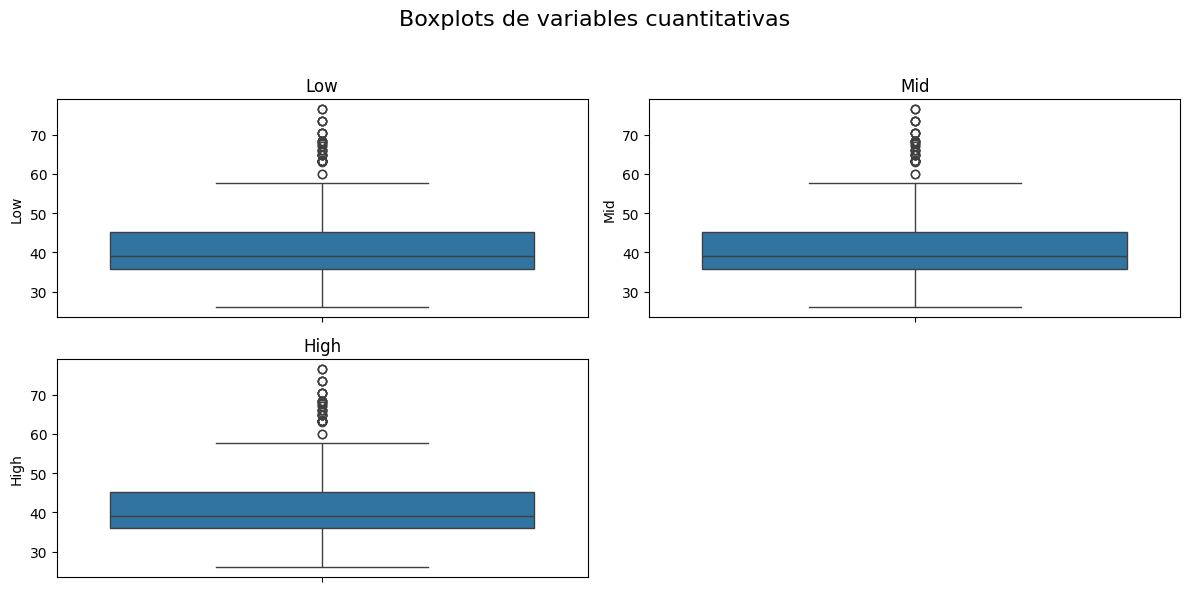

In [ ]:
# Boxplots para visualizar la distribución y detectar outliers:
plt.figure(figsize=(12, 6))
plt.suptitle("Boxplots de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=wBeamsPerfilesEstructurales_df[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Se observa en los boxplots que hay datos atípicos en la misma posición y que el primer cuartil está más cerca de la mediana que el tercer cuartil.

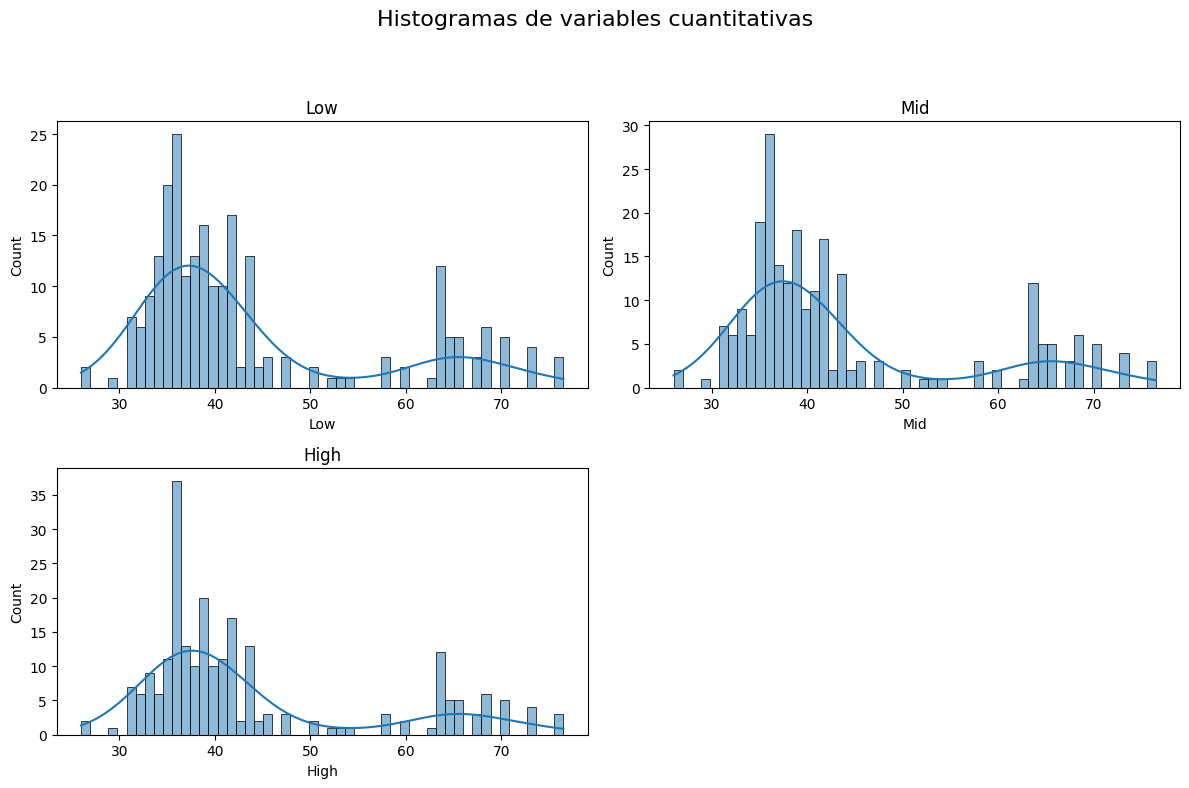

In [ ]:
# Histogramas para analizar la distribución y ver la forma (simétrica/asimétrica):
plt.figure(figsize=(12, 8))
plt.suptitle("Histogramas de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(wBeamsPerfilesEstructurales_df[col], kde=True, bins=53)
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

Se observa un ligero sesgo a la derecha en la distribución, pues los datos más bajos se agrupan más cerca de la mediana.

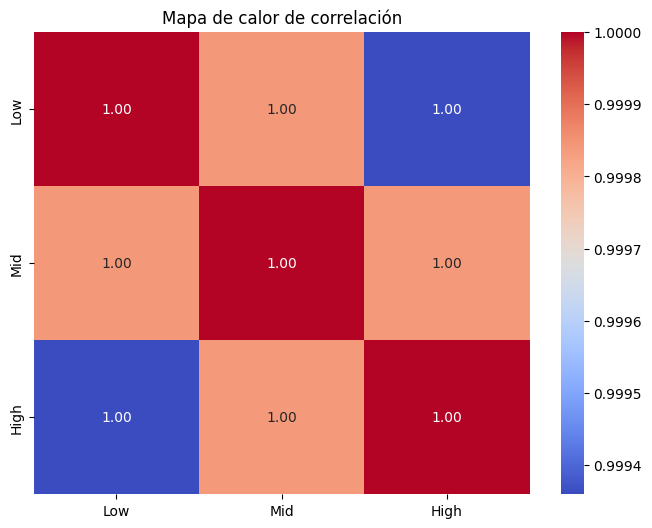

In [ ]:
# Mapa de calor de la correlación entre variables numéricas:
plt.figure(figsize=(8, 6))
corr_matrix = wBeamsPerfilesEstructurales_df[['Low', 'Mid', 'High']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación")
plt.show()

Todas las variables tienen una correlación casi perfecta positiva.

Cada fecha es única, así que si se quieren ver distribuciones de la variable que no sean uniformes para obtener gráficos de barras y de pastel más interesantes, se puede realizar transformaciones a la variable 'Date'.

#### Exportación de los datos

In [ ]:
# Exportar a CSV:
wBeamsPerfilesEstructurales_df.to_csv('wBeamsPerfilesEstructurales.csv', index=False)